<a href="https://colab.research.google.com/github/die666666/Students_Performance_using_Data_Analysis-/blob/main/EDC_Analysis_Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('Private_data.csv')

In [59]:
df.sample(10)

,Unnamed: 0,NAME OF THE STUDENT,GENDER,UNIVERSITY,PROGRAM NAME,Specialisation,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),SEMESTER,RANK,PERCENTILE
18,18,Sophia King,F,"Harvard University, USA",B.Com,Information Technology with Accounting Analytics,BA,48,46,94,5th,19,0.880795
55,55,Lucas Johnson,M,"Stanford University, USA",MBA,Digital Marketing,DM,47,38,85,3rd,56,0.635762
123,123,Emily Moore,F,"Stanford University, USA",BBA,Finance,Finance,32,22,54,5th,124,0.185430
124,124,Noah Martinez,M,"Harvard University, USA",MBA,Innovation Entrepreneurship and Venture Develo...,E&I,19,34,53,3rd,125,0.178808
114,114,Sophia Carter,F,"Harvard University, USA",MBA,International Business,IB,36,25,61,3rd,115,0.245033
23,23,Matthew Johnson,M,"Harvard University, USA",MBA,International Business,IB,49,43,92,3rd,24,0.847682
107,107,Michael Evans,M,"Stanford University, USA",B.Com,Finance,Generic,35,28,63,5th,108,0.291391
86,86,Harper Jackson,M,"Harvard University, USA",MBA,International Business,IB,50,22,72,3rd,87,0.430464
117,117,Sofia Nelson,F,"Stanford University, USA",B.Com,Business Analytics,Generic,30,29,59,5th,118,0.225166
108,108,Zoey Jenkins,F,"Stanford University, USA",B.Com,Business Analytics,BA,49,13,62,5th,109,0.284768


In [60]:
print(pd.isnull(df).sum())

Unnamed: 0                              0
NAME OF THE STUDENT                     0
GENDER                                  0
UNIVERSITY                              0
PROGRAM NAME                            0
Specialisation                          0
Domain                                  0
GENERAL MANAGEMENT SCORE (OUT of 50)    0
Domain Specific SCORE (OUT 50)          0
TOTAL SCORE (OUT of 100)                0
SEMESTER                                0
RANK                                    0
PERCENTILE                              0
dtype: int64


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            151 non-null    int64  
 1   NAME OF THE STUDENT                   151 non-null    object 
 2   GENDER                                151 non-null    object 
 3   UNIVERSITY                            151 non-null    object 
 4   PROGRAM NAME                          151 non-null    object 
 5   Specialisation                        151 non-null    object 
 6   Domain                                151 non-null    object 
 7   GENERAL MANAGEMENT SCORE (OUT of 50)  151 non-null    int64  
 8   Domain Specific SCORE (OUT 50)        151 non-null    int64  
 9   TOTAL SCORE (OUT of 100)              151 non-null    int64  
 10  SEMESTER                              151 non-null    object 
 11  RANK               

In [62]:
for col in df.columns:
  if df[col].dtype == "object":
    print("Current Coloumn: {}".format(col))
    print(df[col].value_counts())
    print("=" * 60)
    print("\n")

Current Coloumn: NAME OF THE STUDENT
NAME OF THE STUDENT
Lily Davis          2
Mia Young           2
Sophia King         2
Carter Hall         2
Scarlett Cooper     2
                   ..
David Rodriguez     1
Noah Parker         1
Jack Scott          1
Charlotte Wilson    1
Emily Lee           1
Name: count, Length: 145, dtype: int64


Current Coloumn: GENDER
GENDER
M    80
F    71
Name: count, dtype: int64


Current Coloumn: UNIVERSITY
UNIVERSITY
Harvard University, USA                              75
Stanford University, USA                             50
University of Oxford, UK                             12
Massachusetts Institute of Technology (MIT), USA      9
University of Cambridge, UK                           2
California Institute of Technology (Caltech), USA     2
Imperial College London, UK                           1
Name: count, dtype: int64


Current Coloumn: PROGRAM NAME
PROGRAM NAME
MBA              57
BBA              44
B.Com            37
Intg. BBA+MBA    13
Nam

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,151.0,75.000000,43.734045,0.000000,37.500000,75.000000,112.500000,150.0
GENERAL MANAGEMENT SCORE (OUT of 50),151.0,37.993377,10.734056,4.000000,32.500000,40.000000,47.000000,50.0
Domain Specific SCORE (OUT 50),151.0,33.635762,11.866751,1.000000,27.000000,36.000000,43.000000,50.0
TOTAL SCORE (OUT of 100),151.0,71.629139,21.200823,5.000000,62.000000,74.000000,89.000000,100.0
RANK,151.0,76.000000,43.734045,1.000000,38.500000,76.000000,113.500000,151.0
PERCENTILE,151.0,0.503311,0.289629,0.006623,0.254967,0.503311,0.751656,1.0


In [64]:
Passing_mark = 45

df["Total_score"] = round((df["GENERAL MANAGEMENT SCORE (OUT of 50)"] + df["Domain Specific SCORE (OUT 50)"] + df["TOTAL SCORE (OUT of 100)"]) /3, 2)

In [65]:
df["Pass"] = False
df["Pass"] = df["Total_score"] >= Passing_mark

In [66]:
df["Pass"].value_counts()

Pass
True     96
False    55
Name: count, dtype: int64

In [93]:
df.head()

,Unnamed: 0,NAME OF THE STUDENT,GENDER,UNIVERSITY,PROGRAM NAME,Specialisation,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),SEMESTER,RANK,PERCENTILE,Total_score,Pass
0,0,Camila Wood,F,"Stanford University, USA",B.Com,Honours,Finance,50,50,100,5th,1,1.000000,66.67,True
1,1,Alexander Thompson,M,"Stanford University, USA",B.Com,Financial Services,Finance,50,50,100,5th,2,0.993377,66.67,True
2,2,Liam Taylor,M,"Harvard University, USA",B.Com,Accounting Analytics,BA,50,50,100,5th,3,0.986755,66.67,True
3,3,Evelyn Jenkins,F,"Stanford University, USA",B.Com,Honours,Finance,49,50,99,5th,4,0.980132,66.00,True
4,4,Michael Jackson,M,"Harvard University, USA",MBA,International Business,IB,50,49,99,3rd,5,0.973510,66.00,True


# Count no. of students Passed

In [68]:
def Passed(column, condition, dataframe):
  result = 0
  result = len(dataframe[dataframe[column] == condition].loc[dataframe["Pass"] == True])
  return result

# Visualization

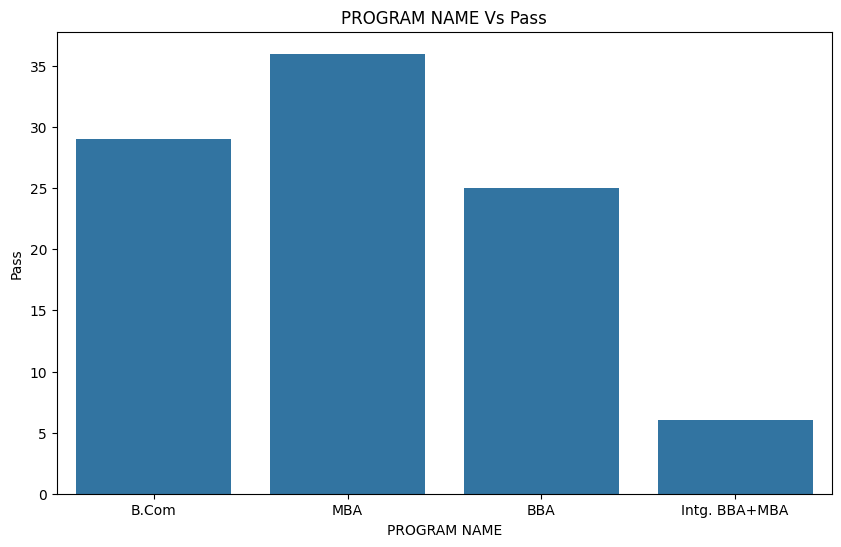

In [69]:
plt.figure(figsize = (10,6))

sns.countplot(x = "PROGRAM NAME", data = df[df["Pass"] == True])
plt.xlabel("PROGRAM NAME")
plt.ylabel("Pass")
plt.title("PROGRAM NAME Vs Pass")
plt.show()

In [70]:
print(df.columns)

Index(['Unnamed: 0', 'NAME OF THE STUDENT', 'GENDER', 'UNIVERSITY',
       'PROGRAM NAME', 'Specialisation', 'Domain',
       'GENERAL MANAGEMENT SCORE (OUT of 50)',
       'Domain Specific SCORE (OUT 50)', 'TOTAL SCORE (OUT of 100)',
       'SEMESTER', 'RANK', 'PERCENTILE', 'Total_score', 'Pass'],
      dtype='object')


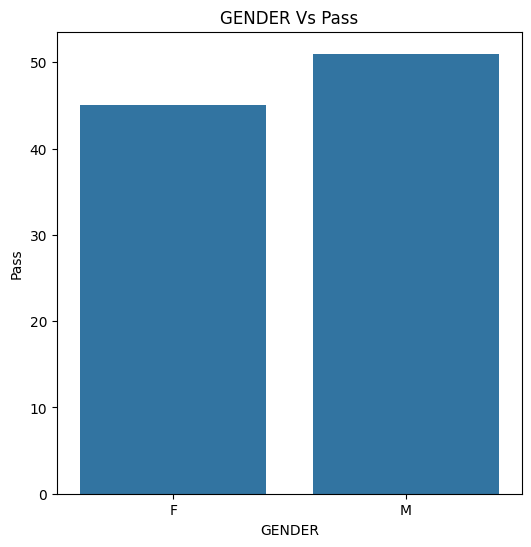

In [72]:
plt.figure(figsize = (6,6))

sns.countplot(x = "GENDER", data = df[df["Pass"] == True])
plt.xlabel("GENDER")
plt.ylabel("Pass")
plt.title("GENDER Vs Pass")
plt.show()

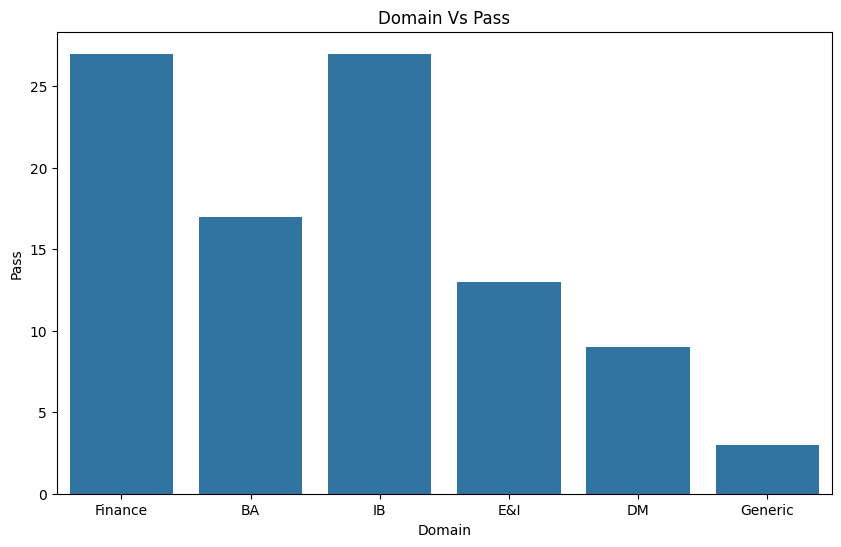

In [73]:
plt.figure(figsize = (10,6))

sns.countplot(x = "Domain", data = df[df["Pass"] == True])
plt.xlabel("Domain")
plt.ylabel("Pass")
plt.title("Domain Vs Pass")
plt.show()

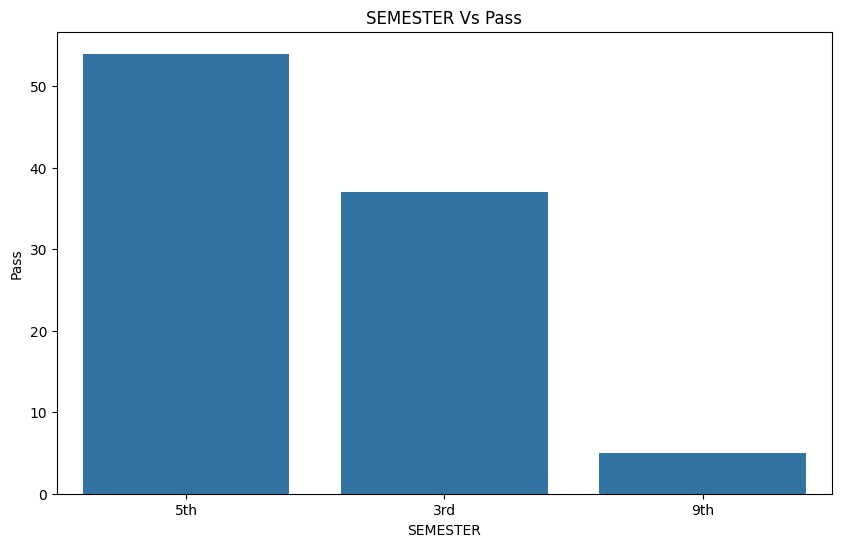

In [74]:
plt.figure(figsize = (10,6))

sns.countplot(x = "SEMESTER", data = df[df["Pass"] == True])
plt.xlabel("SEMESTER")
plt.ylabel("Pass")
plt.title("SEMESTER Vs Pass")
plt.show()

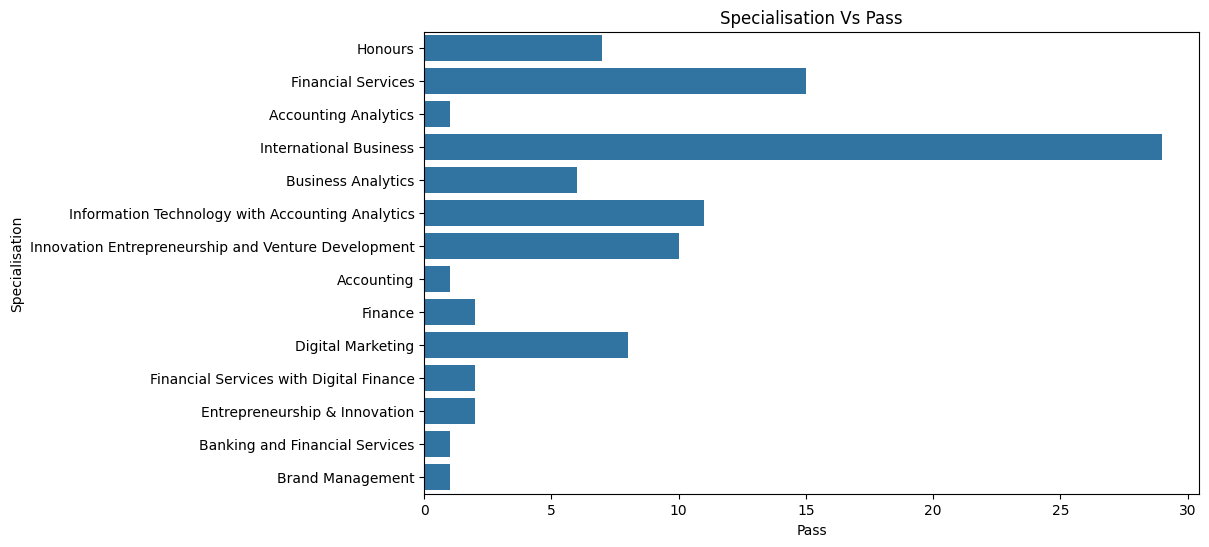

In [77]:
plt.figure(figsize = (10,6))

sns.countplot(y = "Specialisation", data = df[df["Pass"] == True])
plt.xlabel("Pass")
plt.ylabel("Specialisation")
plt.title("Specialisation Vs Pass")
plt.show()

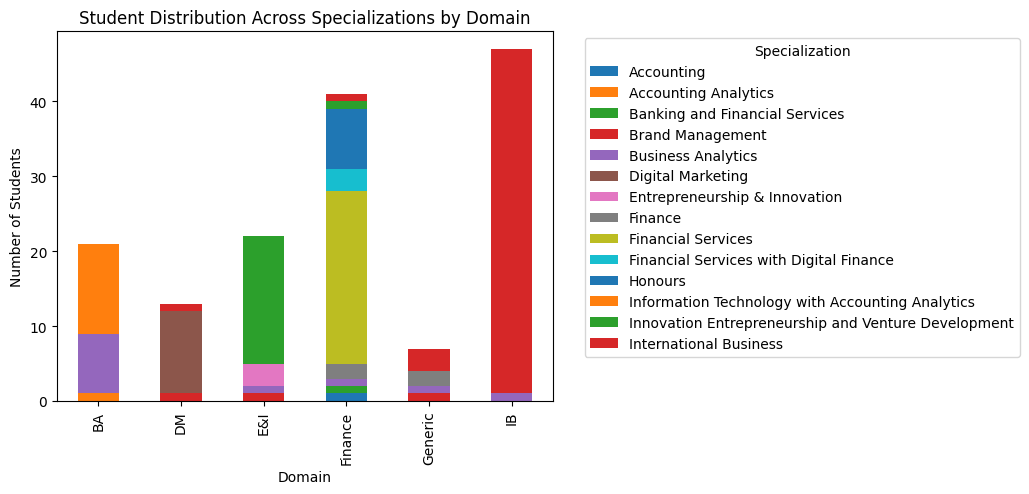

In [92]:
data = df.groupby(['Domain', 'Specialisation'])['NAME OF THE STUDENT'].count().unstack()


data.plot(kind='bar', stacked=True)
plt.xlabel('Domain')
plt.ylabel('Number of Students')
plt.title('Student Distribution Across Specializations by Domain')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')

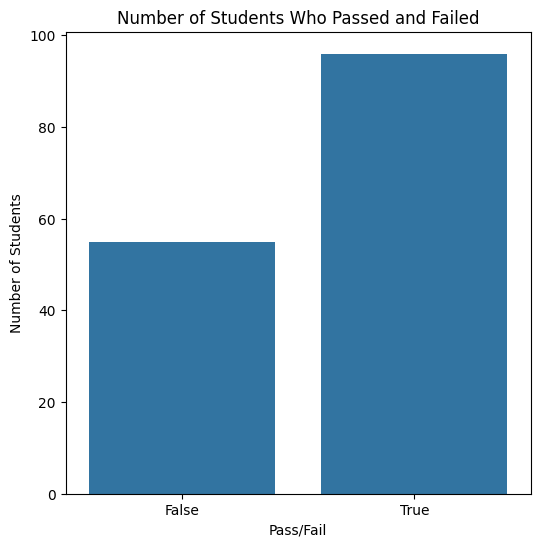

In [90]:
num_passed = df['Pass'].sum()


plt.figure(figsize=(6, 6))
sns.countplot(x='Pass', data = df)
plt.xlabel('Pass/Fail')
plt.ylabel('Number of Students')
plt.title('Number of Students Who Passed and Failed')
plt.show()